<h1 style= "color:orange; font-size:40px"><center>ML Project <span style="color:purple">Country Clustering</span></center></h1>

<h3 style="color: blue"><center>Problem Statement</center></h3><br> HELP International have been able to raise around $ 10 million. Now the CEO of 
the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall 
development of the country.

<h1 style= "color:green"><center>Exploratory data analysis</center></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wn 
wn.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Country-data.csv')
dd = pd.read_csv('data-dictionary.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
pd.set_option('display.max_colwidth', -1)
dd.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [5]:
df.duplicated().sum()

0

<h5 style="color:black"><h5 style="color:black"><ul><li>There are no Duplicated Values in the Dataset.

In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<h5 style="color:black"><ul><li>There are No Null Values in the Dataset at all.

In [7]:
df.shape

(167, 10)

In [8]:
df_cpy = df

In [9]:
df= df.drop(columns='country')

In [10]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
df_cpy.sort_values('child_mort',ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


<h5 style="color:black"><h5 style="color:black"><ul><li>These Are the Top 10 Countries Having Very High Child Mortality Rate.Which Is Not Good for a Good Country.

In [12]:
df_cpy.sort_values('gdpp',ascending=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482


<h5 style="color:black"><h5 style="color:black"><ul><li>These are 10 Countries Having lowest GDPP.

In [13]:
df_cpy.sort_values('inflation',ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100
165,Yemen,56.3,30.0,5.18,34.4,4480,23.6,67.5,4.67,1310
140,Sri Lanka,11.2,19.6,2.94,26.8,8560,22.8,74.4,2.20,2810
3,Angola,119.0,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530
5,Argentina,14.5,18.9,8.10,16.0,18700,20.9,75.8,2.37,10300
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,334


<h5 style="color:black"><h5 style="color:black"><ul><li>The List of 10 Countries Having High Inflation Rate.

In [14]:
df_cpy.sort_values('health',ascending=True).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.98,79.5,2.07,70300
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440


<h5 style="color:black"><h5 style="color:black"><ul><li>Here we can see that health is given as percentage of gdpp so this sorting did not judge      accurate health wise report so finding health expenditure in next cell.

In [15]:
df_cpy.health = ((df_cpy.health*df_cpy.gdpp)/100)

In [16]:
df_cpy.sort_values('health',ascending=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
50,Eritrea,55.2,4.790,12.8212,23.3000,1420,11.60,61.7,4.61,482
93,Madagascar,62.2,25.000,15.5701,43.0000,1390,8.79,60.8,4.60,413
31,Central African Republic,149.0,11.800,17.7508,26.5000,888,2.01,47.5,5.21,446
112,Niger,123.0,22.200,17.9568,49.1000,814,2.55,58.8,7.49,348
107,Myanmar,64.4,0.109,19.4636,0.0659,3720,7.04,66.8,2.41,988
106,Mozambique,101.0,31.500,21.8299,46.2000,918,7.64,54.5,5.56,419
116,Pakistan,92.1,13.500,22.8800,19.4000,4280,10.90,65.3,3.85,1040
37,"Congo, Dem. Rep.",116.0,41.100,26.4194,49.6000,609,20.80,57.5,6.54,334
12,Bangladesh,49.4,16.000,26.6816,21.8000,2440,7.14,70.4,2.33,758
26,Burundi,93.6,8.920,26.7960,39.2000,764,12.30,57.7,6.26,231


<h5 style="color:black"><li>These are 10 Countries lacking in Health.

In [17]:
df_cpy.exports = ((df_cpy.exports*df_cpy.gdpp)/100)
df_cpy.imports = ((df_cpy.imports*df_cpy.gdpp)/100)

In [18]:
List = df_cpy.imports>df_cpy.exports
Impgtexp=[]
Howgreater=[]
for i in range(0,167):
    if (List[i]):
        Impgtexp.append(df_cpy.country[i])
        Howgreater.append(df_cpy.imports[i]-df_cpy.exports[i])
D={'Country Name':Impgtexp,'HowMuchGreater':Howgreater}       
IED = pd.DataFrame(data=D)
IED=IED.sort_values(by=['HowMuchGreater'],ascending=False)
pd.set_option('display.max_rows', 200)
IED.head(20)

,Country Name,HowMuchGreater
5,Bahamas,2436.00
39,Greece,2313.40
28,Cyprus,2248.40
55,Lebanon,2161.84
91,St. Vincent and the Grenadines,1881.46
40,Grenada,1871.98
69,Montenegro,1716.76
96,Tonga,1700.45
79,Portugal,1687.50
102,United States,1645.60


<h5 style="color:black"><h5 style="color:black"><ul><li>20 Countries Having Imports greater than Exports that leads to bad Country Economy.

In [19]:
df_cpy.sort_values('imports',ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
98,Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900


<h5 style="color:black"><h5 style="color:black"><ul><li>10 Countries Having highest Exports.

In [20]:
df_cpy.sort_values('exports',ascending=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988
26,Burundi,93.6,20.60520,26.7960,90.552000,764,12.30,57.7,6.26,231
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.60,61.7,4.61,482
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.01,47.5,5.21,446
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.44,56.2,5.82,553
109,Nepal,47.0,56.71360,31.0800,215.488000,1990,15.10,68.3,2.61,592
88,Liberia,89.3,62.45700,38.5860,302.802000,700,5.47,60.8,5.02,327
132,Sierra Leone,160.0,67.03200,52.2690,137.655000,1220,17.20,55.0,5.20,399
126,Rwanda,63.6,67.56000,59.1150,168.900000,1350,2.61,64.6,4.51,563
112,Niger,123.0,77.25600,17.9568,170.868000,814,2.55,58.8,7.49,348


<h5 style="color:black"><h5 style="color:black"><ul><li>10 Countries Having lowest exports.

In [21]:
df_cpy.sort_values('life_expec',ascending=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,460.980,129.8700,1181.700,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
166,Zambia,83.1,540.200,85.9940,451.140,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,104.652,30.2481,160.191,1030,12.10,53.1,5.31,459
137,South Africa,53.7,2082.080,650.8320,1994.720,12000,6.35,54.3,2.59,7280
106,Mozambique,101.0,131.985,21.8299,193.578,918,7.64,54.5,5.56,419
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399
64,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390,2.97,55.6,5.05,547
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.44,56.2,5.82,553


<h5 style="color:black"><h5 style="color:black"><ul><li> 10 Countries In which Life Expectancy is Lowest

In [22]:
df_cpy.sort_values('total_fer',ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.39,56.5,6.59,897
97,Mali,137.0,161.4240,35.2584,248.508,1870,4.37,59.5,6.55,708
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
149,Timor-Leste,62.6,79.2000,328.3200,1000.800,1850,26.50,71.1,6.23,3600
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.40,60.1,6.16,3530
155,Uganda,81.0,101.7450,53.6095,170.170,1540,10.60,56.8,6.15,595
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575
113,Nigeria,130.0,589.4900,118.1310,405.420,5150,104.00,60.5,5.84,2330


<h5 style="color:black"><h5 style="color:black"><ul><li> Top 10 Countries in which Total Fertility Rate is Highest.

In [23]:
df = df_cpy.drop(columns='country')

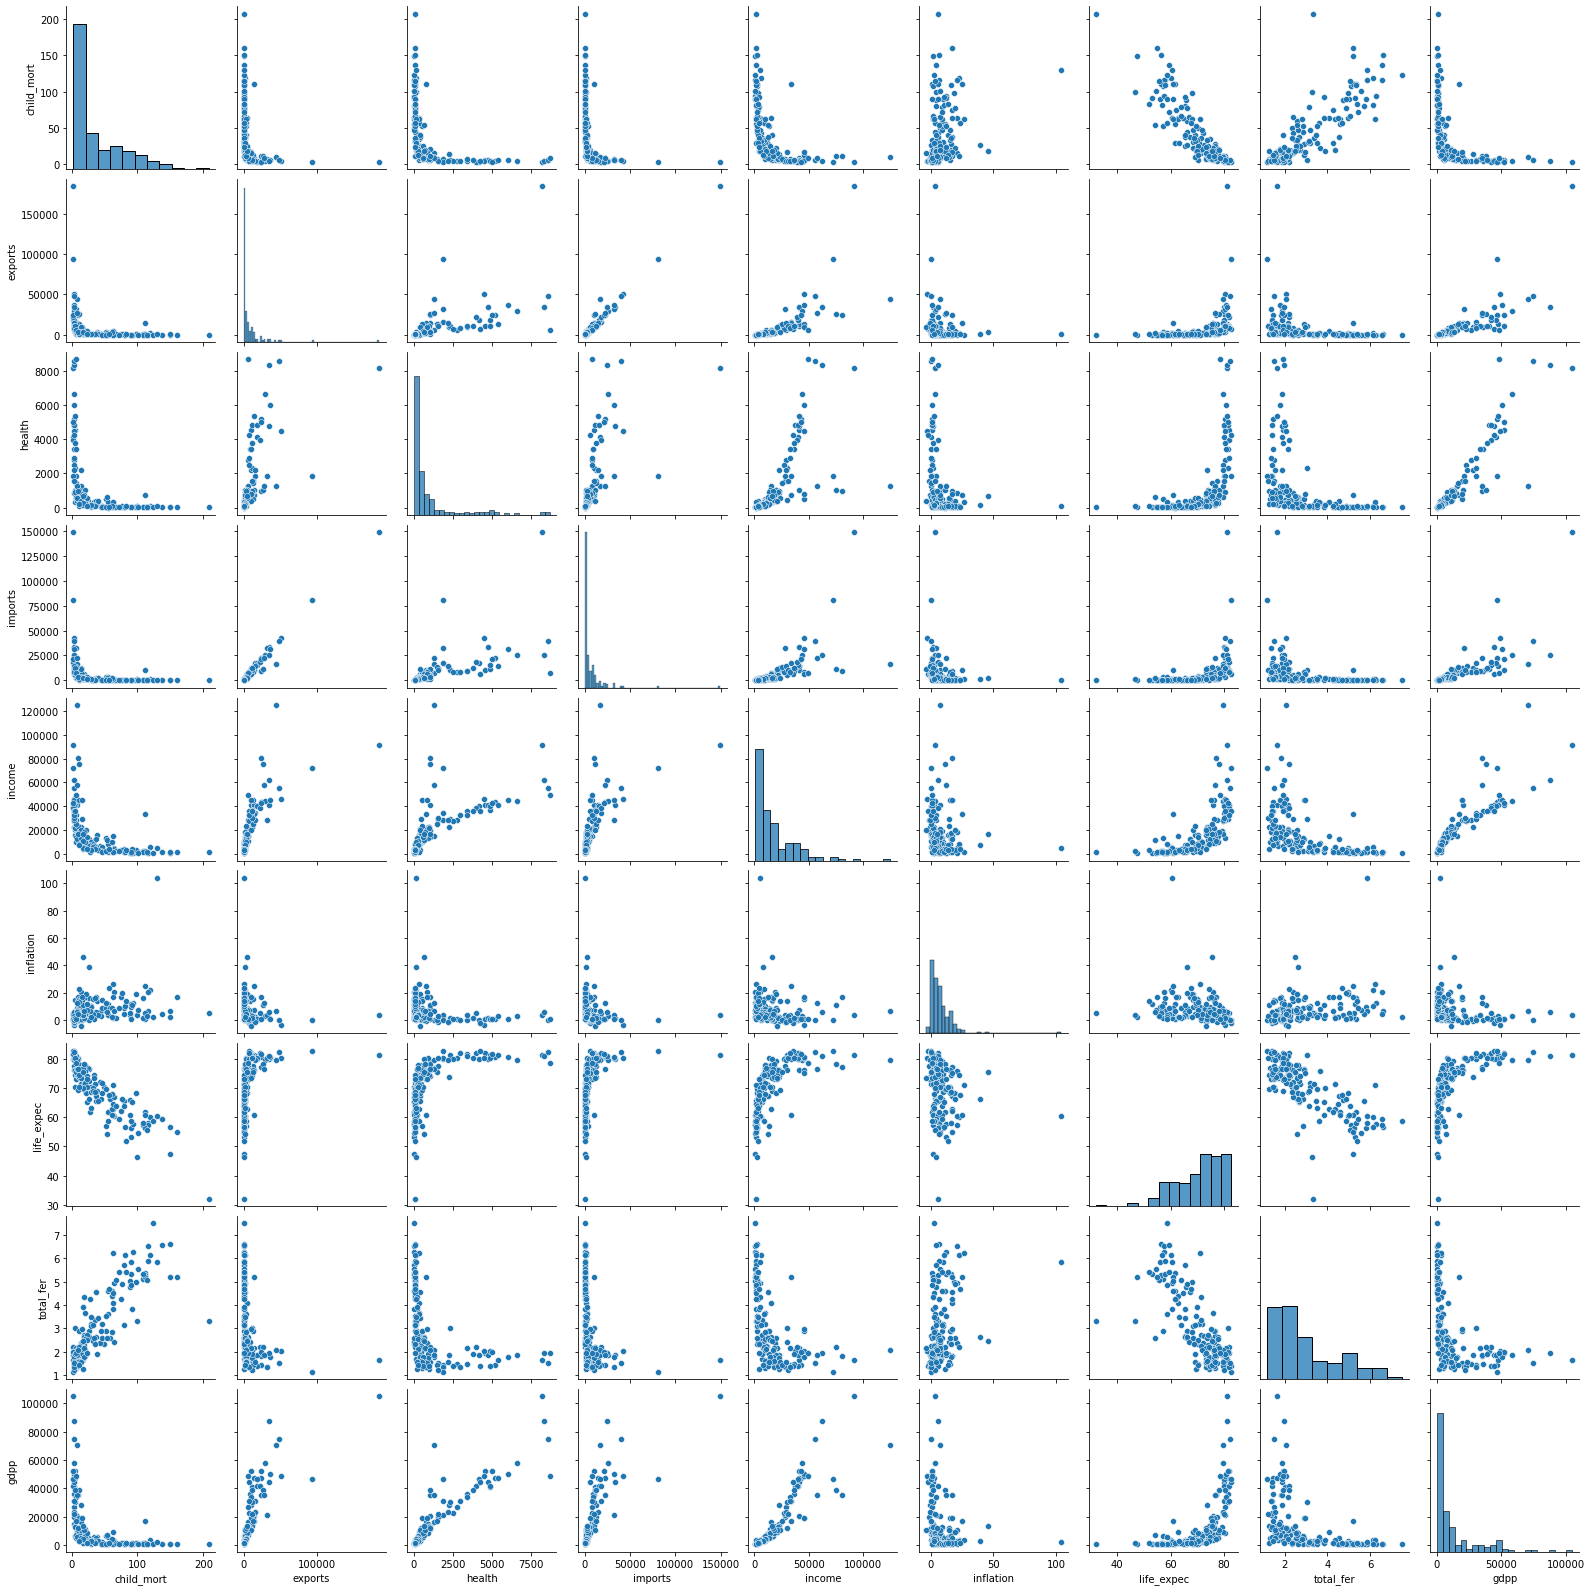

In [24]:
sns.pairplot(data=df)
plt.show()

<h5 style="color:black"><h5 style="color:black"><li> Checking Corelation

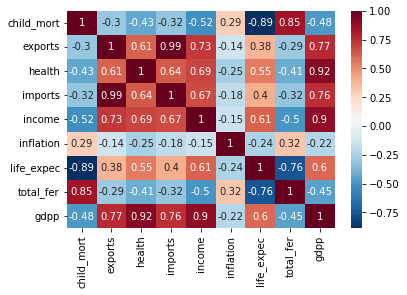

In [25]:
sns.heatmap(data=df.corr(),cmap='RdBu_r', annot=True)
plt.show()

<h5 style="color:black"><h5 style="color:black">There is Highest Correlation is betweeen</h5><li>health and gdpp which is 0.95<li>income and gdpp which is 0.9<li>child mortality and total Fertality Which is 0.85
<li>exports and gdpp Which is 0.77.

In [26]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<h5 style="color:black"><h5 style="color:black"><li>There May be Outliers Present in Exports Imports Income and GDPP

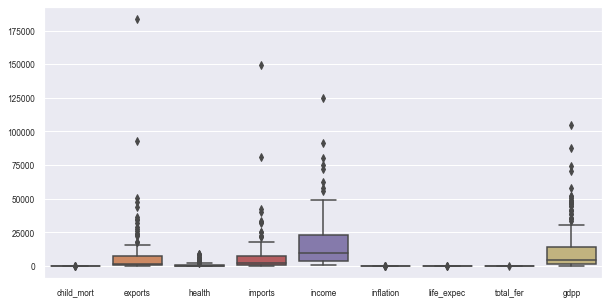

In [27]:
sns.set(rc={'figure.figsize':(10,5)}, font_scale=.75)
sns.boxplot(data=df,orient='v')
plt.show()

<h5 style="color:black"><h5 style="color:black"><li>There are Outliers Present in Exports Gdpp and Income to large Extent. and in Health and Imports are there but very Less. <h5>

<h1 style= "color:green"><center>Creating Model - K Means</center></h1>

In [28]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

<h5 style="color:black"><h5 style="color:black"><li>I Have Applied Standard Scaler also but that is giving Final Model Score less as compared to Min Max Scaler

In [29]:
scaler = MinMaxScaler()
x = scaler.fit_transform(df)

In [30]:
# Saving Data for Hierchical Clustering 
x2 = x

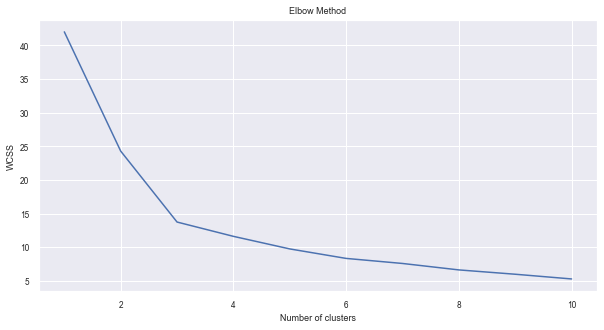

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


<h5 style="color:black"><h5 style="color:black"><li>From The Elbow Curve Above We Choose the Number of cluster to be 3 In this Case

In [32]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(x)
clusters = kmeans.predict(x)

In [33]:
clusters

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

<h5 style="color:black"><h5 style="color:black"><li>These are the clusters Assigned to all countries.Now we add This to our dataset.

In [34]:
df_cpy['cluster']=clusters

In [35]:
df_cpy.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


<h3 style="color:blue"><center>Visualizing Clusters Graphically

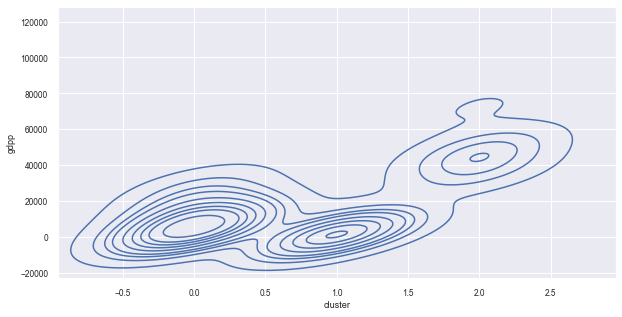

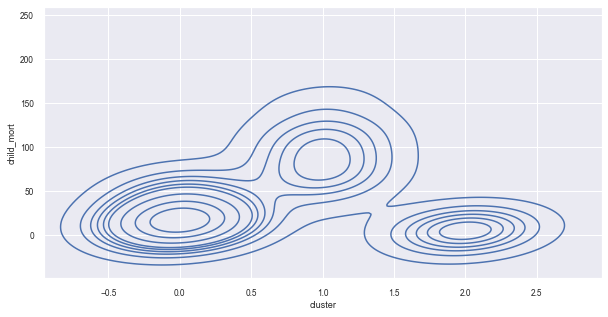

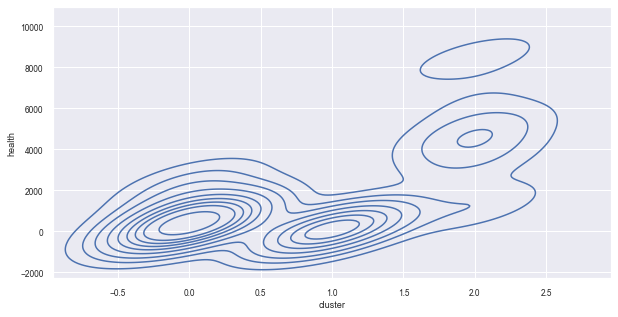

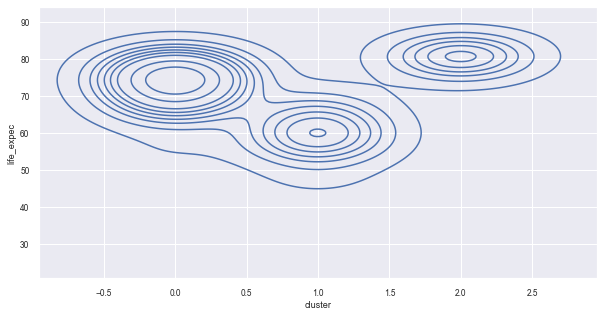

In [36]:
sns.kdeplot(x=df_cpy.cluster,y=df_cpy.gdpp)
plt.show()
sns.kdeplot(x=df_cpy.cluster,y=df_cpy.child_mort)
plt.show()
sns.kdeplot(x=df_cpy.cluster,y=df_cpy.health)
plt.show()
sns.kdeplot(x=df_cpy.cluster,y=df_cpy.life_expec)
plt.show()

<h5 style="color:black"><h5 style="color:black"><li>Now We analyse The Clusters on  the basis of the features we have chosed in eda for selection of countries.

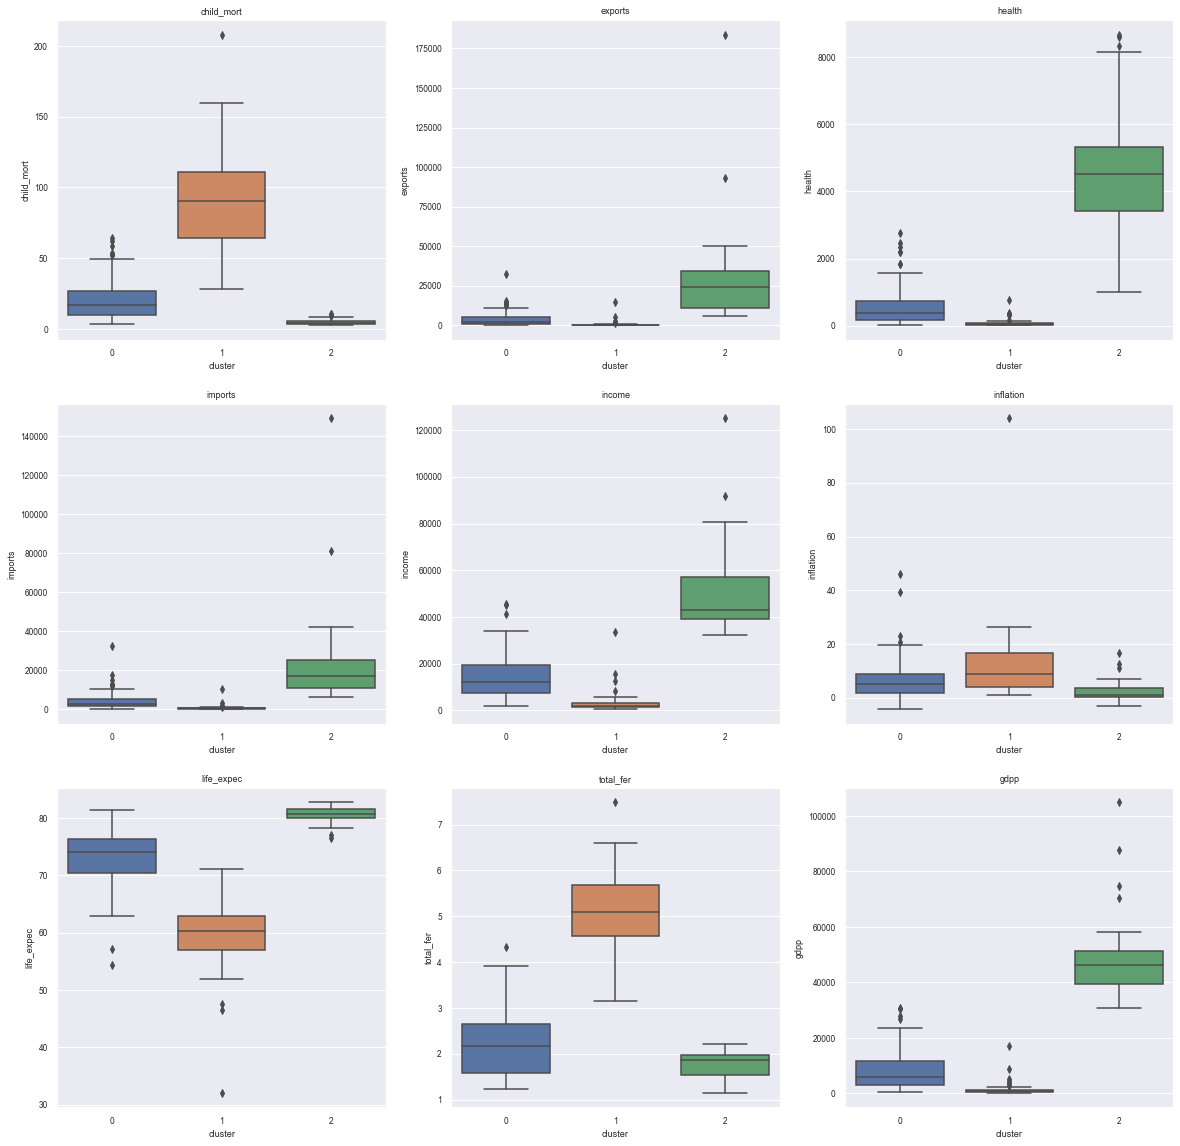

In [37]:
import seaborn as sns
l=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df_cpy.cluster,df_cpy[l[i]])
    plt.title(l[i])

As We can See from the boxplots Above that the countries in <b style="color:red">Cluster 1</b> Having<b><br>1.Less GDPP<br>2.High Child Mort<br>3.High Total Fertility Rate Which Leads to More Population<br>4.Less Life Expectancy<br>5.High Inflation<br>6.Very Less Income<br>7.Very Less Exports<br>8.Very Less expenditure on Health<br><b>

 <h5 style="color:black"><h5 style="color:black"><li>So these are the Countries Definitely Need to be Focused By The Ngo.

In [38]:
Lowest_countries= df_cpy[df_cpy['cluster']==1]

In [39]:
Lowest_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,1
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,1


In [40]:
Developing = df_cpy[df_cpy['cluster']==0]
Developed = df_cpy[df_cpy['cluster']==2]
print(Lowest_countries.shape)
print(Developing.shape)
print(Developed.shape)
print(46+95+26)
print(df_cpy.shape)

(46, 11)
(95, 11)
(26, 11)
167
(167, 11)


We are Checking that Our Clustering Envolved all The Countries or Not

In [41]:
List_countries = Lowest_countries['country']

In [42]:
print(List_countries)

0      Afghanistan             
3      Angola                  
17     Benin                   
25     Burkina Faso            
26     Burundi                 
28     Cameroon                
31     Central African Republic
32     Chad                    
36     Comoros                 
37     Congo, Dem. Rep.        
38     Congo, Rep.             
40     Cote d'Ivoire           
49     Equatorial Guinea       
50     Eritrea                 
55     Gabon                   
56     Gambia                  
59     Ghana                   
63     Guinea                  
64     Guinea-Bissau           
66     Haiti                   
72     Iraq                    
80     Kenya                   
81     Kiribati                
84     Lao                     
87     Lesotho                 
88     Liberia                 
93     Madagascar              
94     Malawi                  
97     Mali                    
99     Mauritania              
106    Mozambique              
108    N

<h1 style= "color:green"><center>Creating Model - Hierchical Clustering</center></h1>

In [43]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit_predict(x2)
df_cpy['clusterHC']= model.labels_

In [44]:
df_cpy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,clusterHC
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,2


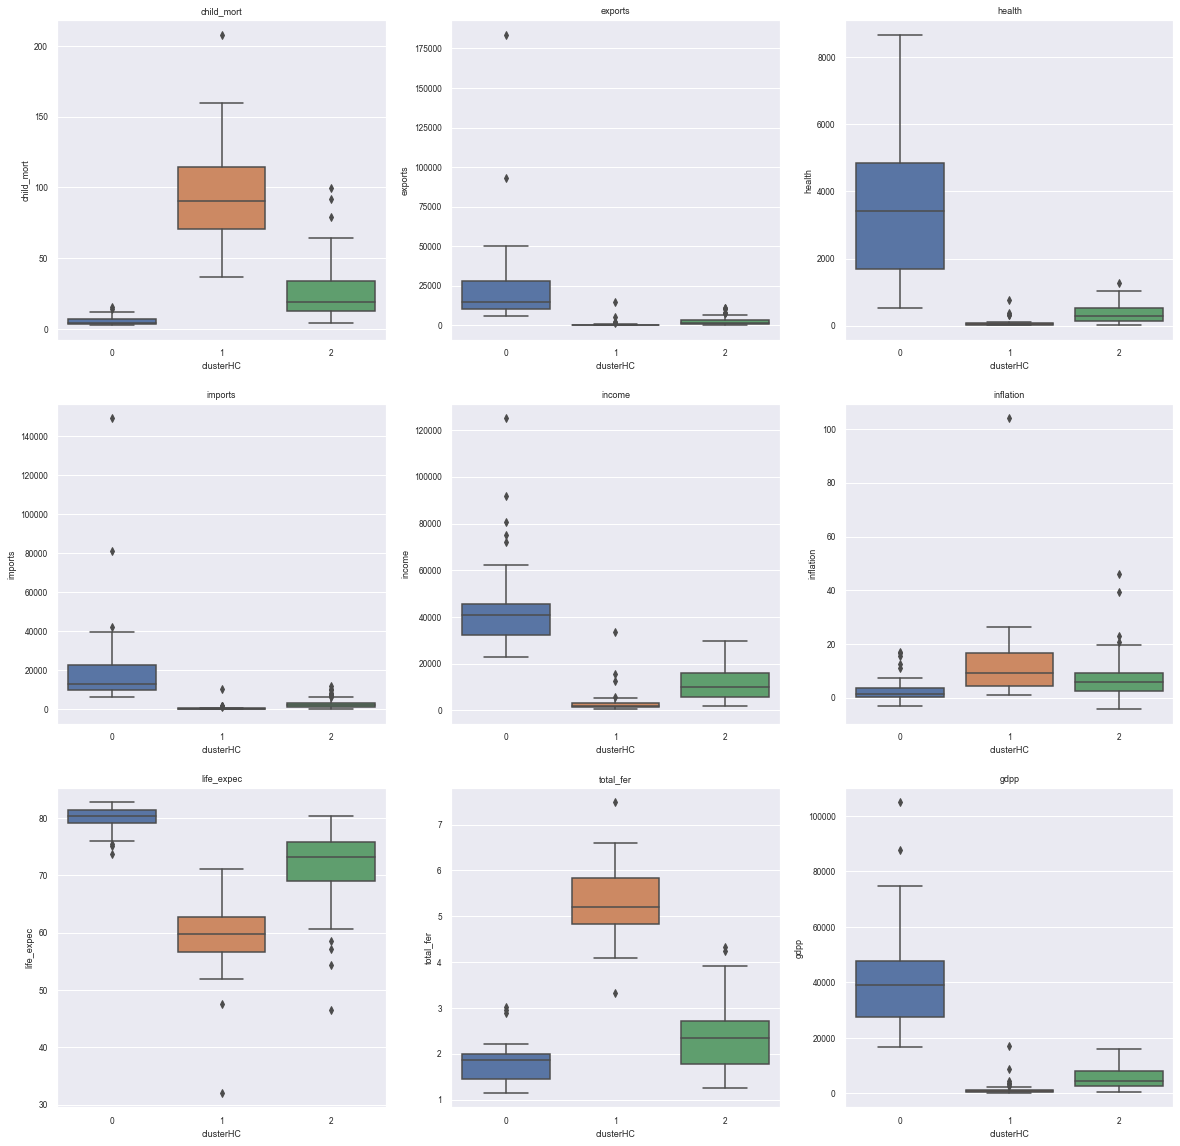

In [45]:
import seaborn as sns
l=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df_cpy.clusterHC,df_cpy[l[i]])
    plt.title(l[i])

As We can See from the boxplots Above that the countries in Cluster 1 Having<b><br>1.Less GDPP<br>2.High Child Mort<br>3.High Total Fertility Rate Which Leads to More Population<br>4.Less Life Expectancy<br>5.High Inflation<br>6.Very Less Income<br>7.Very Less Exports<br>8.Very Less expenditure on Health<br><b>
    

In [46]:
Lowest_countries= df_cpy[df_cpy['clusterHC']==1]

In [47]:
Lowest_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,clusterHC
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,1,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,1,1
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,1,1
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,1,1
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,1,1
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,1,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,1,1
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,1,1
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,1,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,1,1


In [48]:
cluster0 = df_cpy[df_cpy['clusterHC']==0]
cluster2 = df_cpy[df_cpy['clusterHC']==2]
print(Lowest_countries.shape)
print(cluster0.shape)
print(cluster2.shape)
print(40+39+88)
print(df_cpy.shape)

(40, 12)
(39, 12)
(88, 12)
167
(167, 12)


<h5 style="color:black"><h5 style="color:black"><li>We Can See That This have Classified 40 Countries and k means have Classified 46 but we can see that these above countries are in same cluster according to both clusters.

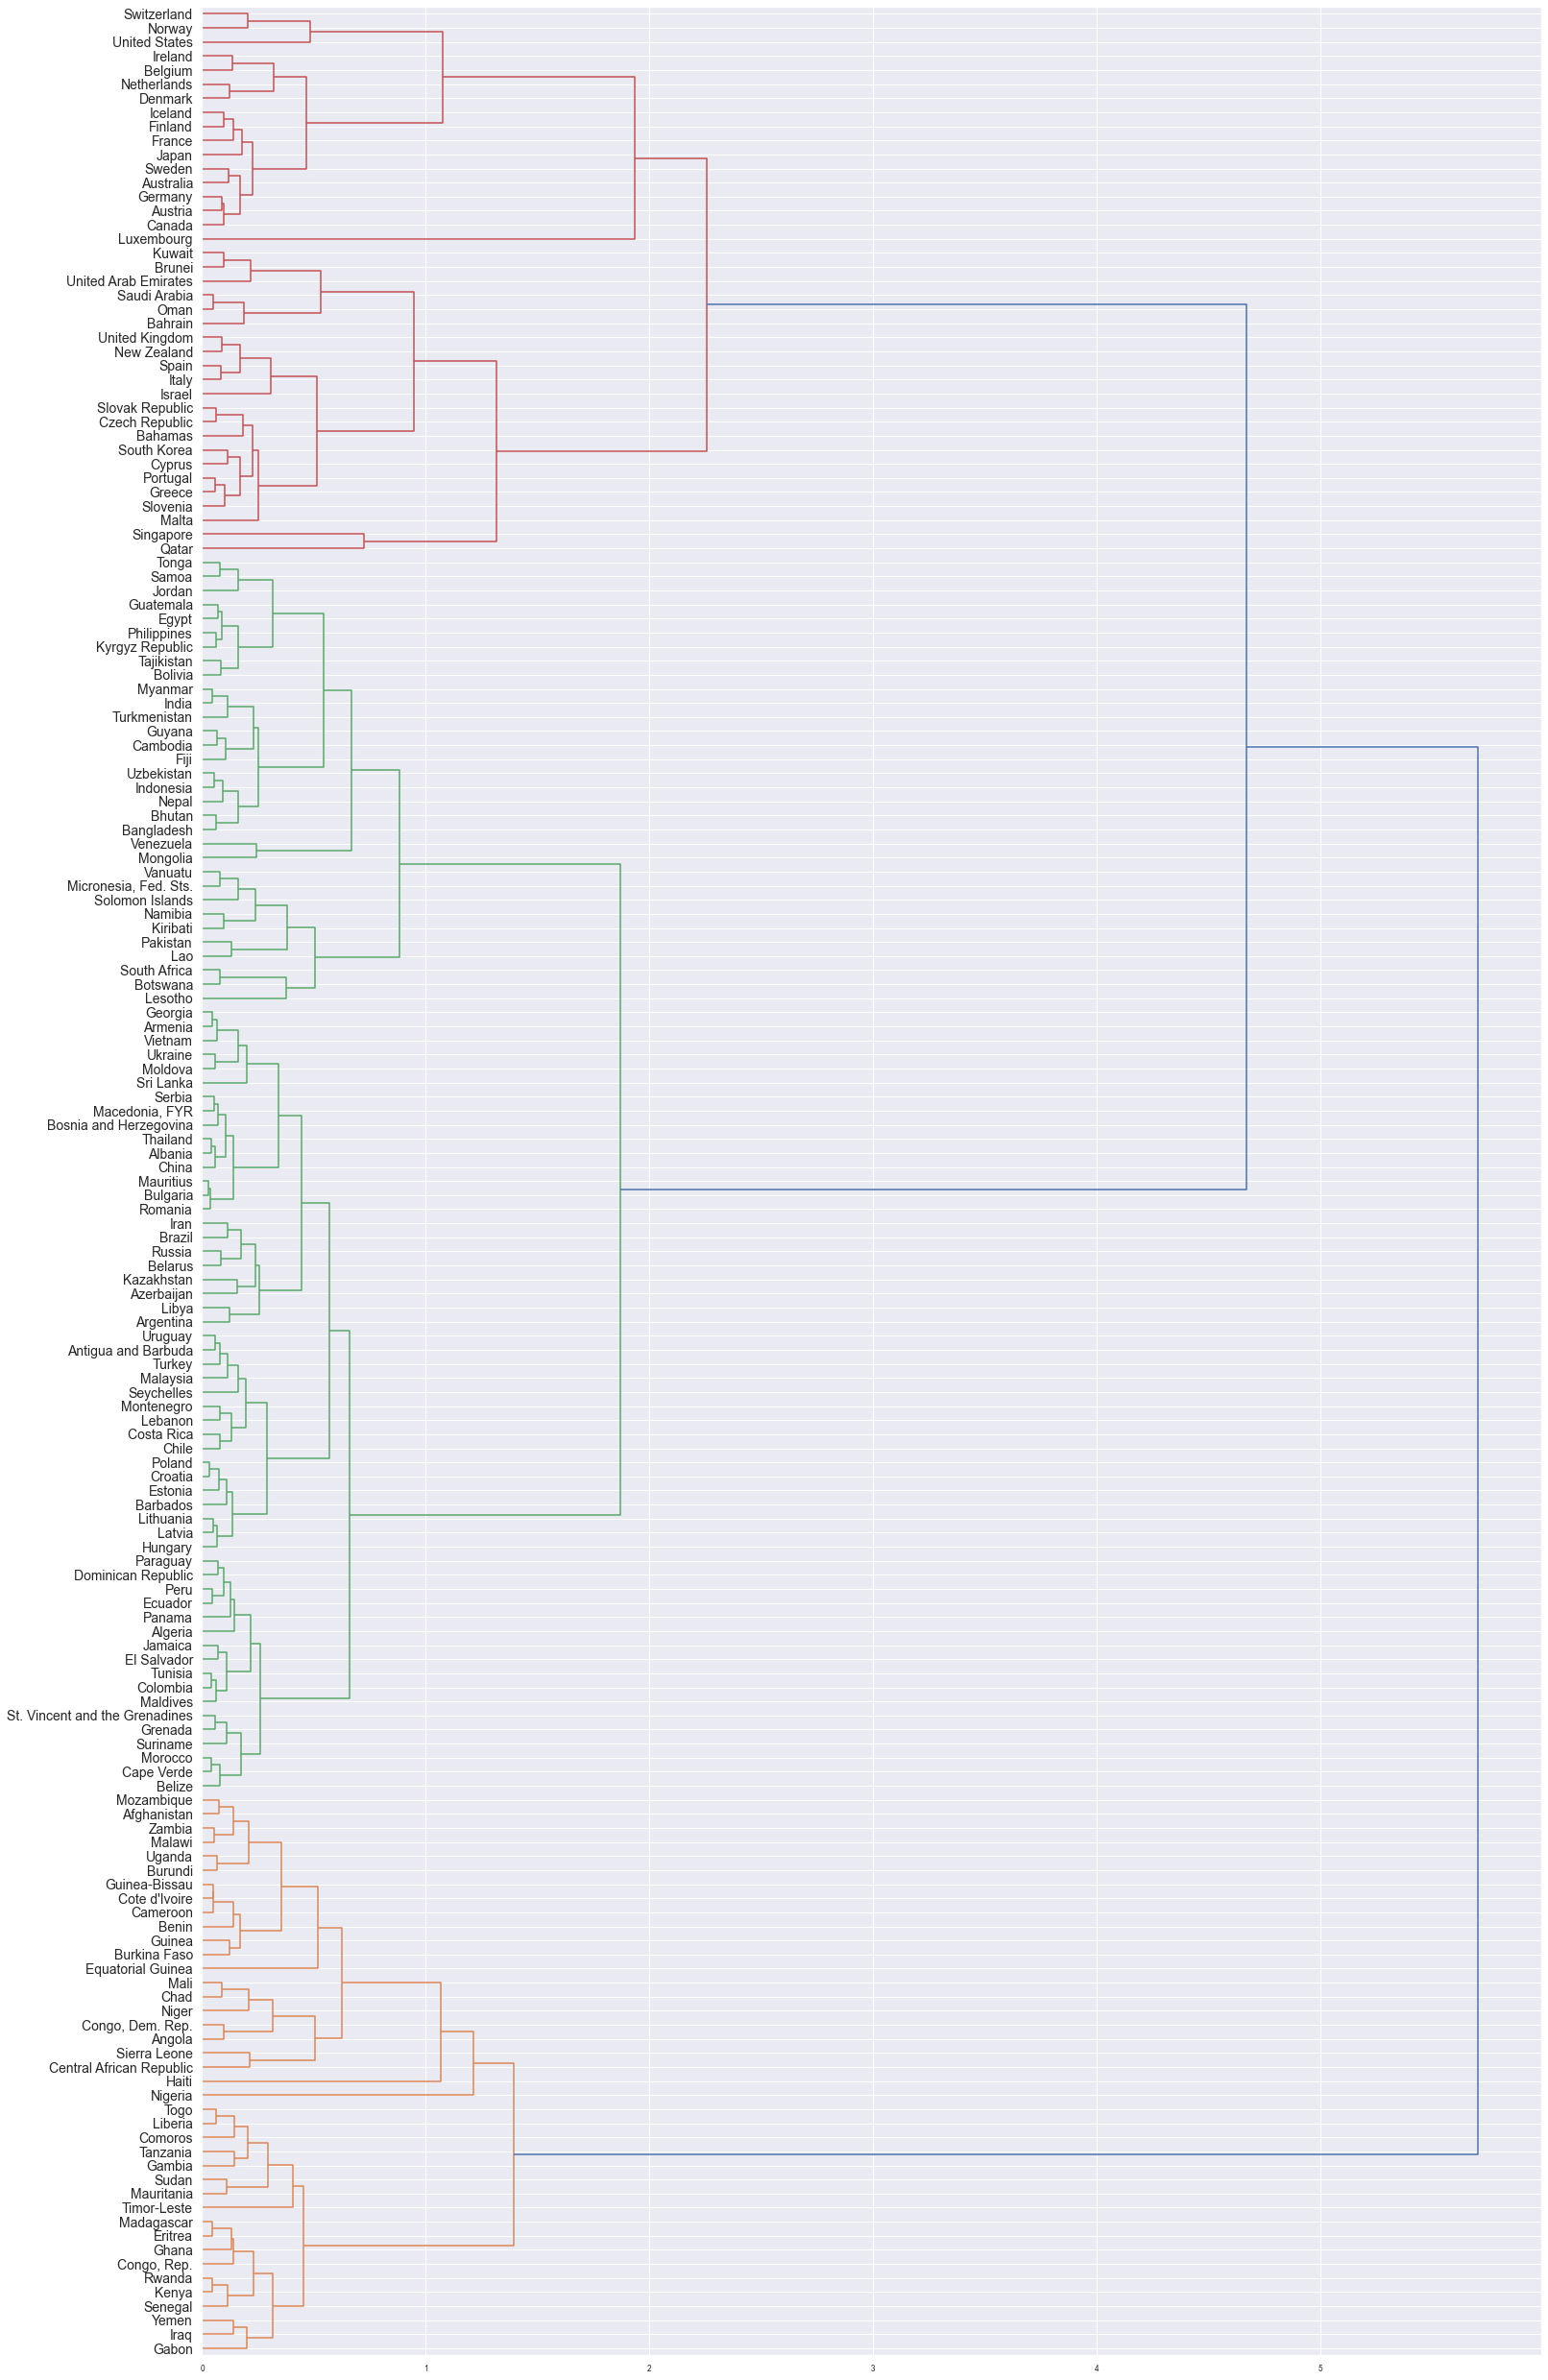

In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25, 45))
Z = linkage(x2, method='ward')

dendrogram(
    Z,  
    orientation='right',
    labels=df_cpy['country'].values,
    distance_sort='assending',
    show_leaf_counts=True,
    leaf_font_size=14,
)
plt.show()

<h5 style="color:black"><h5 style="color:black"><li>Green Color Are The Classified Cluster Dendogram

<h1 style= "color:green"><center><b>Calculating Performance</b></center></h1>

<h3 style= "color:blue"><center>For Hierchical clustering</center></h3>

In [50]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [51]:
silhouette_avg = silhouette_score(x2, model.labels_)
silhouette_avg

0.4413193655673136

In [52]:
ch_score = calinski_harabasz_score(x2, model.labels_)
ch_score

149.9860971231719

<h3 style= "color:blue"><center>For K Means clustering</center></h3>

In [53]:
silhouette_avg = silhouette_score(x,clusters)
silhouette_avg

0.4875688325246982

In [54]:
ch_score = calinski_harabasz_score(x, clusters)
ch_score

168.89645031547616

<h1 style= "color:green"><center><b>Conclusion</b></center></h1>

<h3 style= "color:green"><center>The Countries Which are in Need of Aid Are</center></h3>

<h5 style="color:black"><h5 style="color:black"><li>Note That We are Considering Results Of K means Clustering as Final Result Because It has a good Score. There are 46 Countries that are in need of Aid.

In [55]:
Lowest_countries= df_cpy[df_cpy['cluster']==1]

In [56]:
C=[]
for country in Lowest_countries['country']:
    C.append(country)
data = {"S.No":[i for i in range(1,47)],"Country":C}
Result= pd.DataFrame(data=data)
Result.sort_values(by=['Country'],inplace=True)    

In [57]:
Result

,S.No,Country
0,1,Afghanistan
1,2,Angola
2,3,Benin
3,4,Burkina Faso
4,5,Burundi
5,6,Cameroon
6,7,Central African Republic
7,8,Chad
8,9,Comoros
9,10,"Congo, Dem. Rep."
